## Official Cohort Default Rates for Schools from the U.S. Department of Education
Exploratory analysis<br>
Elizabeth Clark<br>
Feb. 5, 2018

### Fig. 1: Cohort-to-cohort correlation between loan default rates

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data was downloaded from https://www2.ed.gov/offices/OSFAP/defaultmanagement/cdr.html: FY 2014, FY 2013, and FY 2012 official cohort default rates published for schools participating in the Title IV student financial assistance programs.

In [2]:
# Load data
xlsx = pd.ExcelFile('peps300.xlsx')
title5_default = pd.read_excel(xlsx)

# Check for duplicate records
x1 = title5_default.drop_duplicates('OPEID')
x2 = x1.drop_duplicates(['Name', 'City', 'State', 'Address'])
if len(title5_default) == len(x1) == len(x2):
    print('there are no duplicates.')

there are no duplicates.


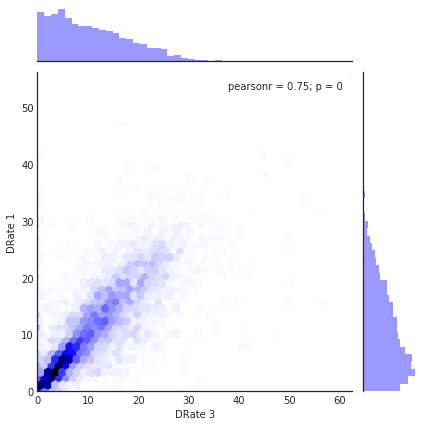

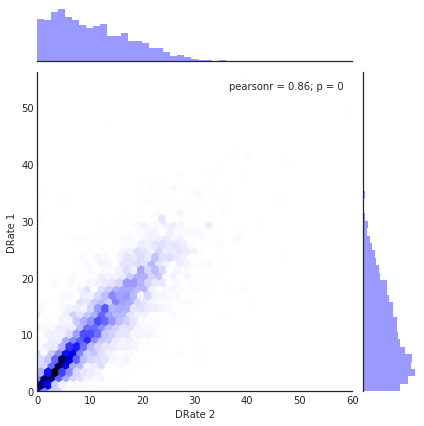

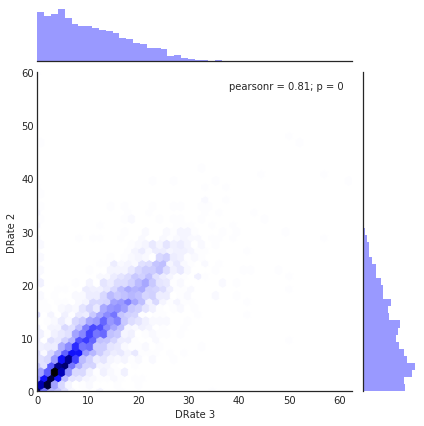

In [3]:
# Plot default rates from each fiscal year against one of them to
# see if there is much year-to-year variation
with sns.axes_style("white"):
    for y_yr, x_yr in zip([1, 1, 2], [3, 2, 3]):
        x = title5_default['DRate {}'.format(x_yr)]
        y = title5_default['DRate {}'.format(y_yr)]
        xlabel = 'Default rate in FY{}'.format(
            title5_default['Year {}'.format(x_yr)].loc[0])
        ylabel = 'Default rate in FY{}'.format(
            title5_default['Year {}'.format(y_yr)].loc[0])
        sns.jointplot(x=x, y=y, kind='hex', color='b')